# BTC Price Prediction – EDA Stage

---

##  Notebook Overview

Welcome to the **Exploratory Data Analysis (EDA)** stage of our **Bitcoin (BTC) price prediction** project. In this notebook, we will explore and understand the BTC market data to uncover patterns, trends, and insights that will guide our modeling phase.

---

### This notebook contains:

- **Exploratory analysis** of the BTC prices dataframe  
-  **Visual representations** of trends, correlations, and distributions  
-  Extraction of **actionable insights** for modeling  
-  **Data storytelling** to build a narrative from raw information  

---

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# Load data
df = pd.read_csv("../data/btc_prediction_datawranglingStage.csv")
sns.set(style='ticks')
df.dropna(inplace=True)
df.head()

,Date,open,high,low,close,volume,rsi,ema_long,ema_short,atr,adx,obv,close_nextday,close_fut
0,2019-11-10,8809.18,9147.19,8750.00,9039.47,34422.03,52.752795,8943.684865,8952.097120,416.907736,32.235253,-263583.25,8733.27,9041.31
1,2019-11-11,9040.16,9072.32,8618.68,8733.27,44888.05,47.035155,8935.433302,8931.256442,419.531469,30.529734,-308471.30,8821.94,8728.93
2,2019-11-12,8733.36,8888.00,8567.60,8821.94,40366.63,48.766878,8930.982584,8920.845352,412.450650,28.782504,-268104.67,8777.12,8817.00
3,2019-11-13,8821.91,8844.99,8702.00,8777.12,26810.12,47.914104,8924.948757,8907.157223,393.203460,27.160075,-294914.79,8646.68,8774.76
4,2019-11-14,8777.54,8800.00,8582.60,8646.68,33468.47,45.424542,8914.036257,8882.349869,380.646070,25.243077,-328383.26,8471.73,8642.25


In [36]:
mean = round(np.mean(df.close), 2)
std = round(np.std(df.close, ddof=1),2)
print('Mean:', mean,
      '\nStd:', std)


Mean: 40226.14 
Std: 26156.01


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2041 non-null   object 
 1   open           2041 non-null   float64
 2   high           2041 non-null   float64
 3   low            2041 non-null   float64
 4   close          2041 non-null   float64
 5   volume         2041 non-null   float64
 6   rsi            2041 non-null   float64
 7   ema_long       2041 non-null   float64
 8   ema_short      2041 non-null   float64
 9   atr            2041 non-null   float64
 10  adx            2041 non-null   float64
 11  obv            2041 non-null   float64
 12  close_nextday  2041 non-null   float64
 13  close_fut      2041 non-null   float64
dtypes: float64(13), object(1)
memory usage: 223.4+ KB


In [38]:
print(df.describe())

                open           high            low          close  \
count    2041.000000    2041.000000    2041.000000    2041.000000   
mean    40177.152224   41082.691930   39223.610755   40226.142391   
std     26121.316887   26627.635694   25597.892981   26156.005337   
min      4800.010000    5365.420000    3782.130000    4800.000000   
25%     19629.080000   20179.080000   19237.000000   19695.870000   
50%     35071.420000   36137.720000   33851.120000   35286.510000   
75%     57970.900000   59398.900000   56552.820000   57991.150000   
max    111696.220000  111980.000000  109177.370000  111696.210000   

              volume          rsi       ema_long      ema_short          atr  \
count    2041.000000  2041.000000    2041.000000    2041.000000  2041.000000   
mean    78785.462749    53.177159   39105.803620   39773.304924  1843.417575   
std     88431.359203    13.515336   24924.165762   25659.604588  1236.126785   
min      5420.220000    15.044409    7124.235507    6513.6

In [39]:
# new dataframe without target

df2 = df.drop('close_nextday', axis=1)

df2.head(1)

,Date,open,high,low,close,volume,rsi,ema_long,ema_short,atr,adx,obv,close_fut
0,2019-11-10,8809.18,9147.19,8750.0,9039.47,34422.03,52.752795,8943.684865,8952.09712,416.907736,32.235253,-263583.25,9041.31


#Correlation Threshold
-Low correlation = 0.2 - 0.4
-Mid correlation = 0.4 - 0.6
-High correlation = 0.6 - 0.8
-Each of these three levels are a threshold of correlation respectively. The higher the number, the more likely these two variables are correlated with eachother.

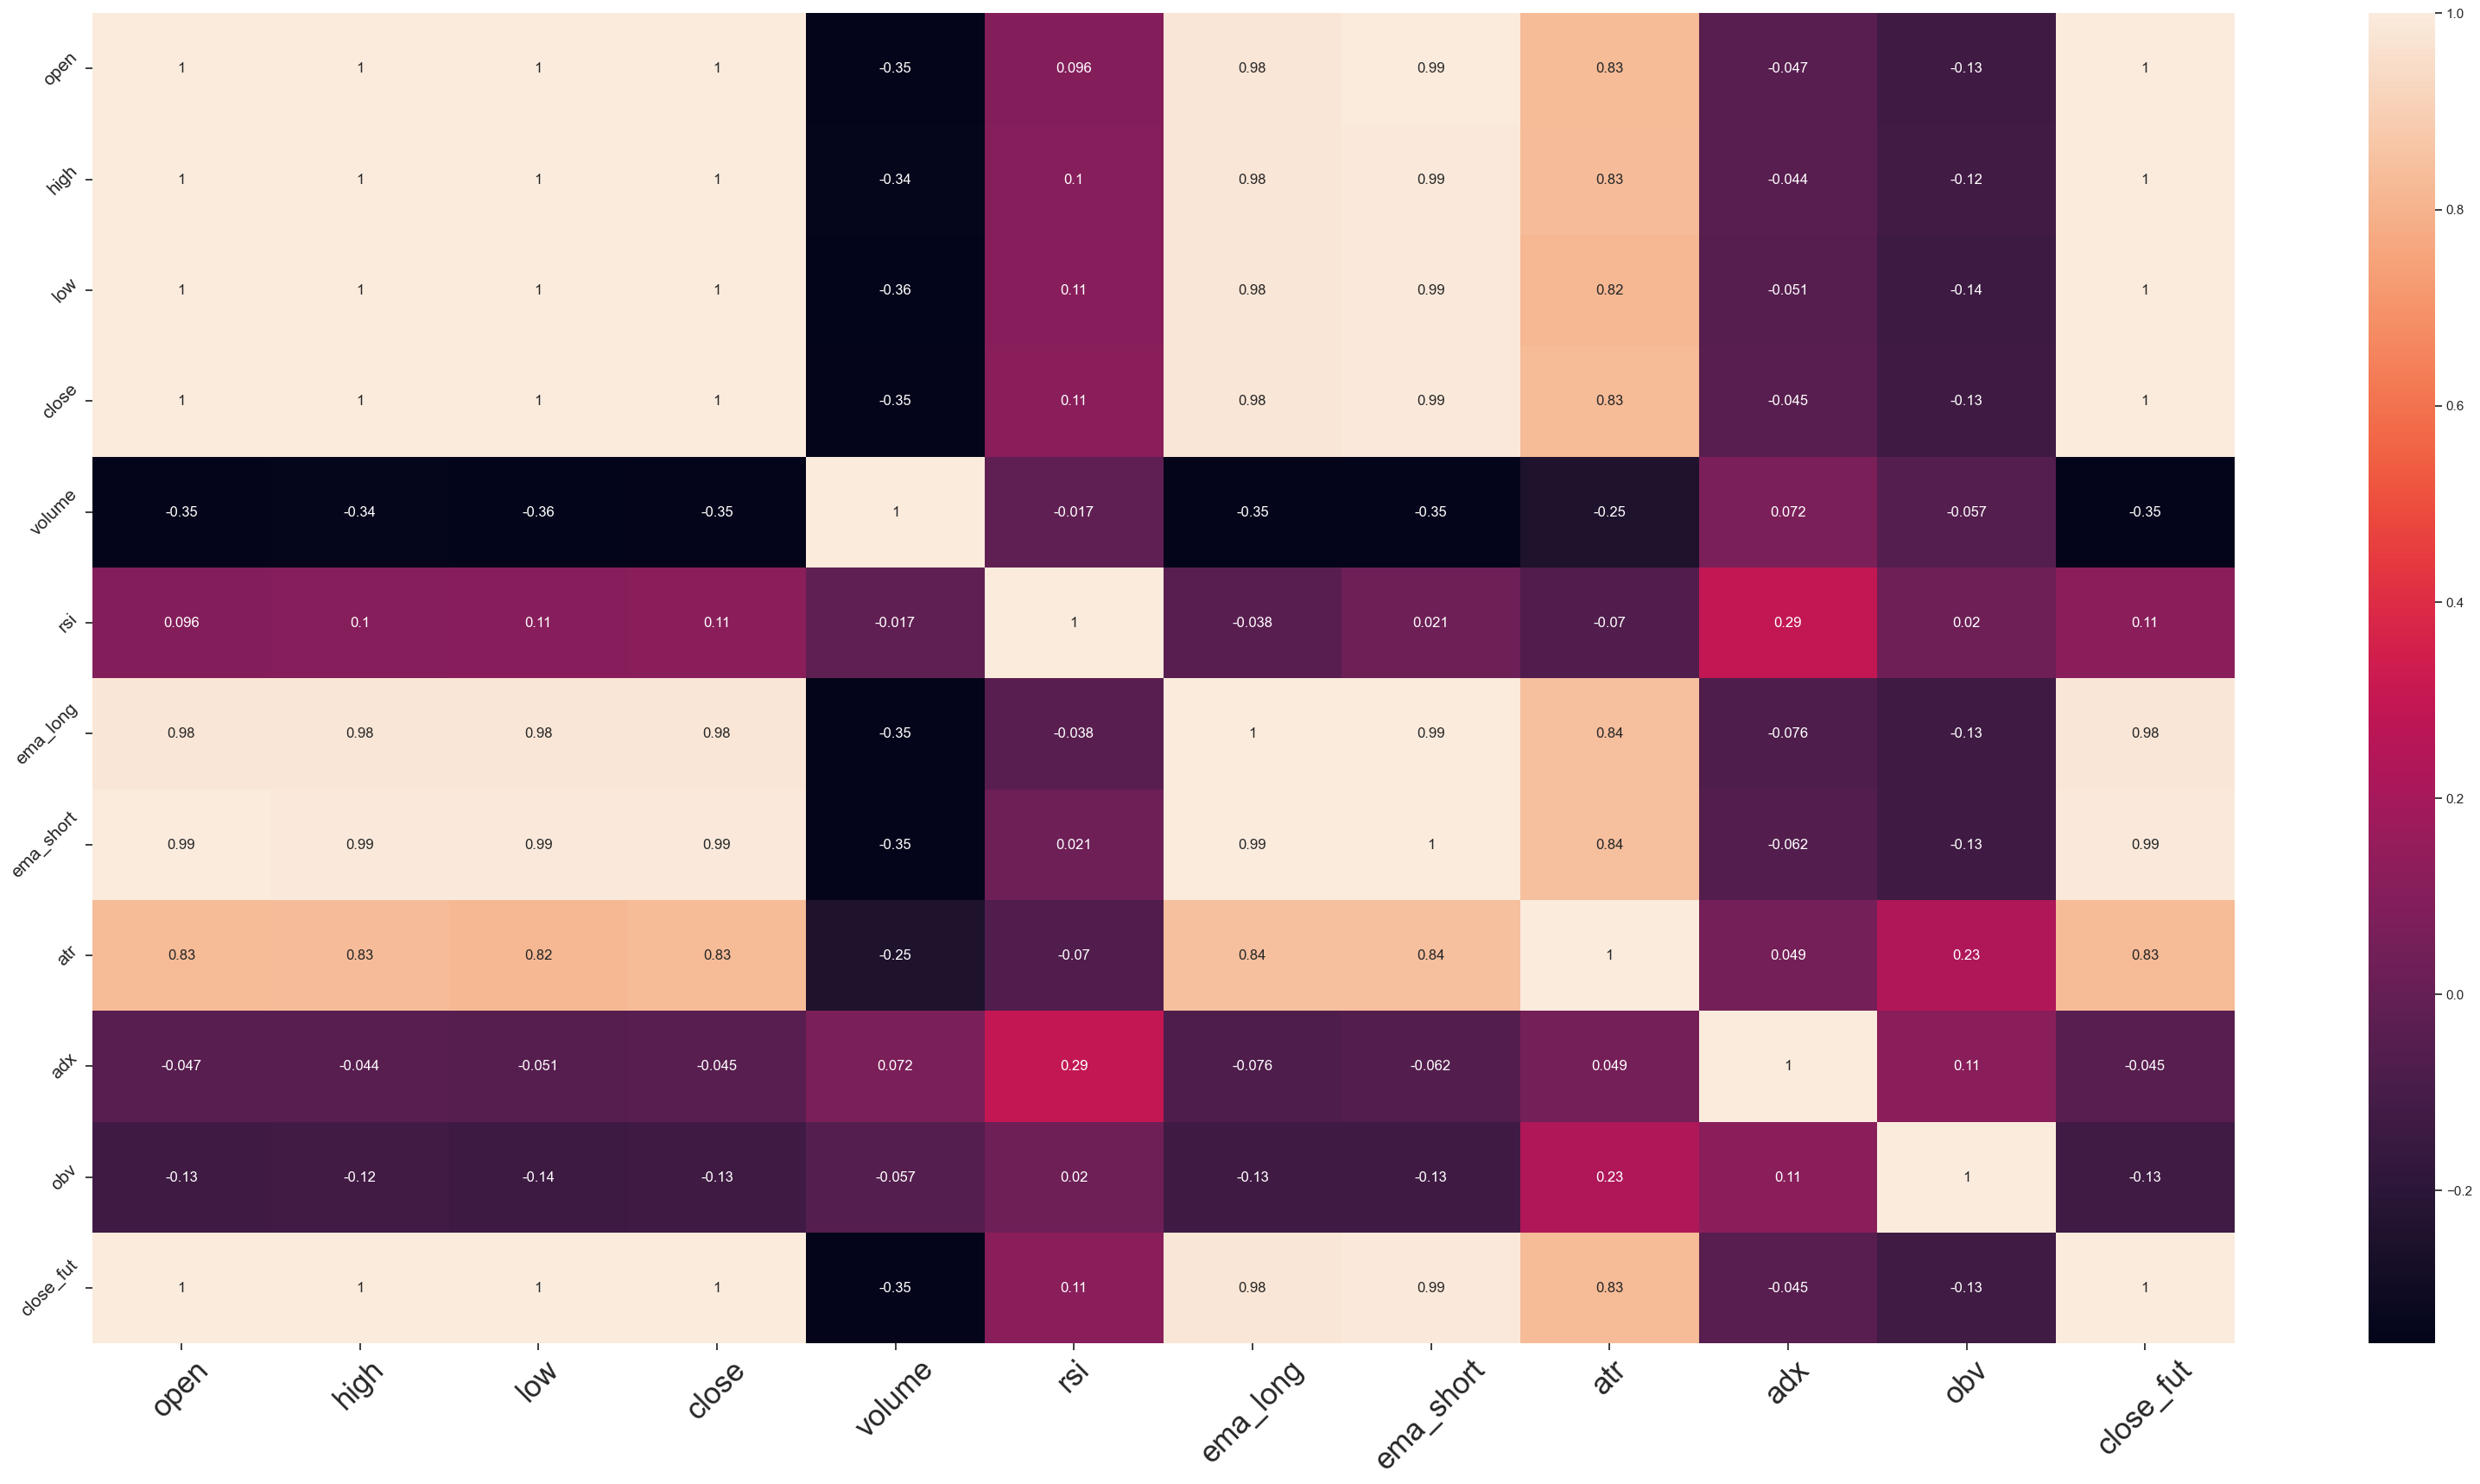

In [42]:
# correlation heatmap without target included

_ = plt.figure(figsize=(40,20))
# Exclude non-numeric columns like 'Date' from correlation calculation
numeric_cols = df2.select_dtypes(include=[np.number]).columns
_ = sns.heatmap(df2[numeric_cols].corr(), annot=True)
_ = plt.tick_params(labelsize=25, axis='x', labelrotation = 45)
_ = plt.tick_params(labelsize=15, axis='y', labelrotation = 45)

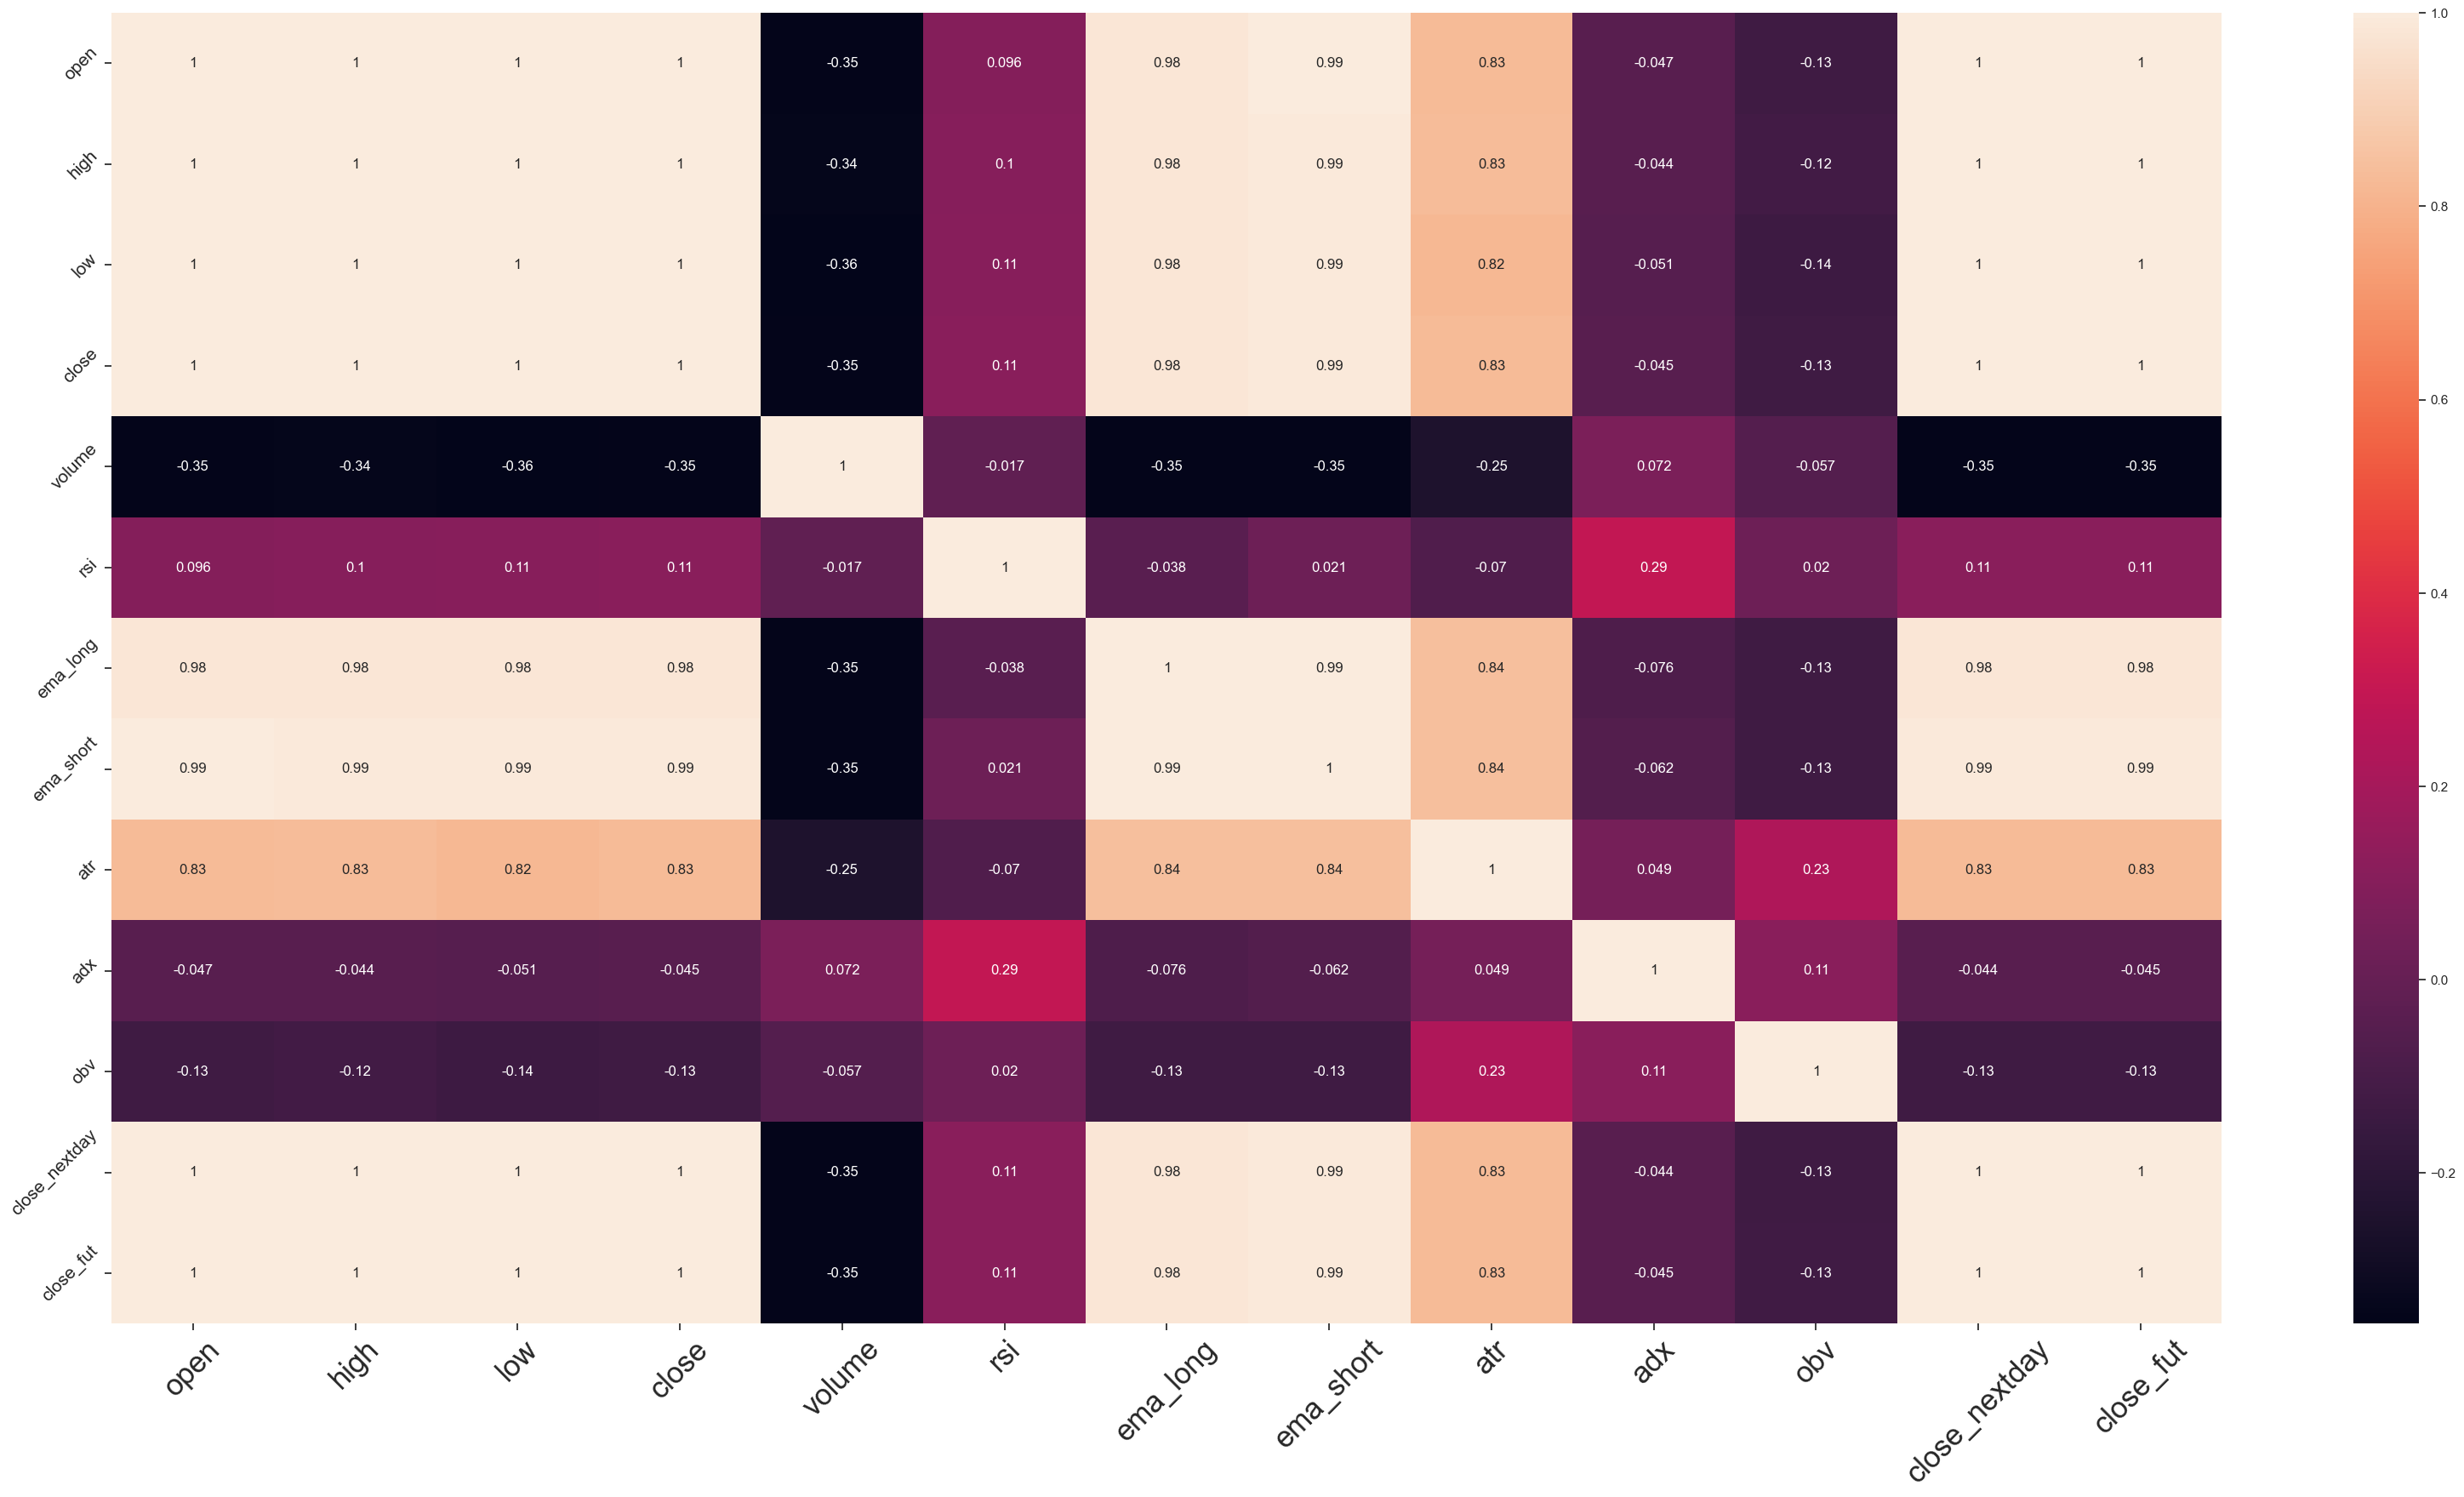

In [43]:
# correlation heatmap with target included

_ = plt.figure(figsize=(40,20))
# Exclude non-numeric columns like 'Date' from correlation calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
_ = sns.heatmap(df[numeric_cols].corr(), annot=True)
_ = plt.tick_params(labelsize=25, axis='x', labelrotation = 45)
_ = plt.tick_params(labelsize=15, axis='y', labelrotation = 45)

In [45]:
corr = df[['open', 'high', 'low','close', 'close_nextday']].corr()

c1 = corr.abs().unstack()
c2 = c1.sort_values(ascending = False)
c2 = c2.iloc[13:14]

f = open('../data/highest_corr_target.txt', 'a')
f.write("print(c2)")
f.close

<function TextIOWrapper.close()>

Variables that have a high correlation:

OBV/Close
ATR/Volume
OBV/Ema_short
Variables that have low correlation:

Ema_short/volume
Ema_long/volume
Initial Questions:
Why are the high, low, open and close prices (OHLC) so highly correlated?
It is said that when the open and close are far apart it shows strong momentum, and when the open and close are close together it shows indecision or weak momentum. The high and low show the full price range of the period. This knowledge can be useful in assessing volatility.

- Can the OHLC distances be used to show correlation in conjunction with other indicators such as the RSI or even strengthen the ATR? Since the ATR is a measure of volatility can these measurements be utilized further?
How are the correlated variables distributed in density over the time range of historical data?
Is there any linear assumptions or normality assumptions within the predictors and target?
Is there a possibility for any "data leakage"?

In [49]:
# subset original dataframe to examine OHLC levels from random range

df3 = df.drop(['close_nextday', 'rsi', 'ema_long', 'ema_short', 'obv', 'atr', 'adx'], axis=1)
df3 = df3[60:80]

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 60 to 79
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   open       20 non-null     float64
 2   high       20 non-null     float64
 3   low        20 non-null     float64
 4   close      20 non-null     float64
 5   volume     20 non-null     float64
 6   close_fut  20 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.2+ KB


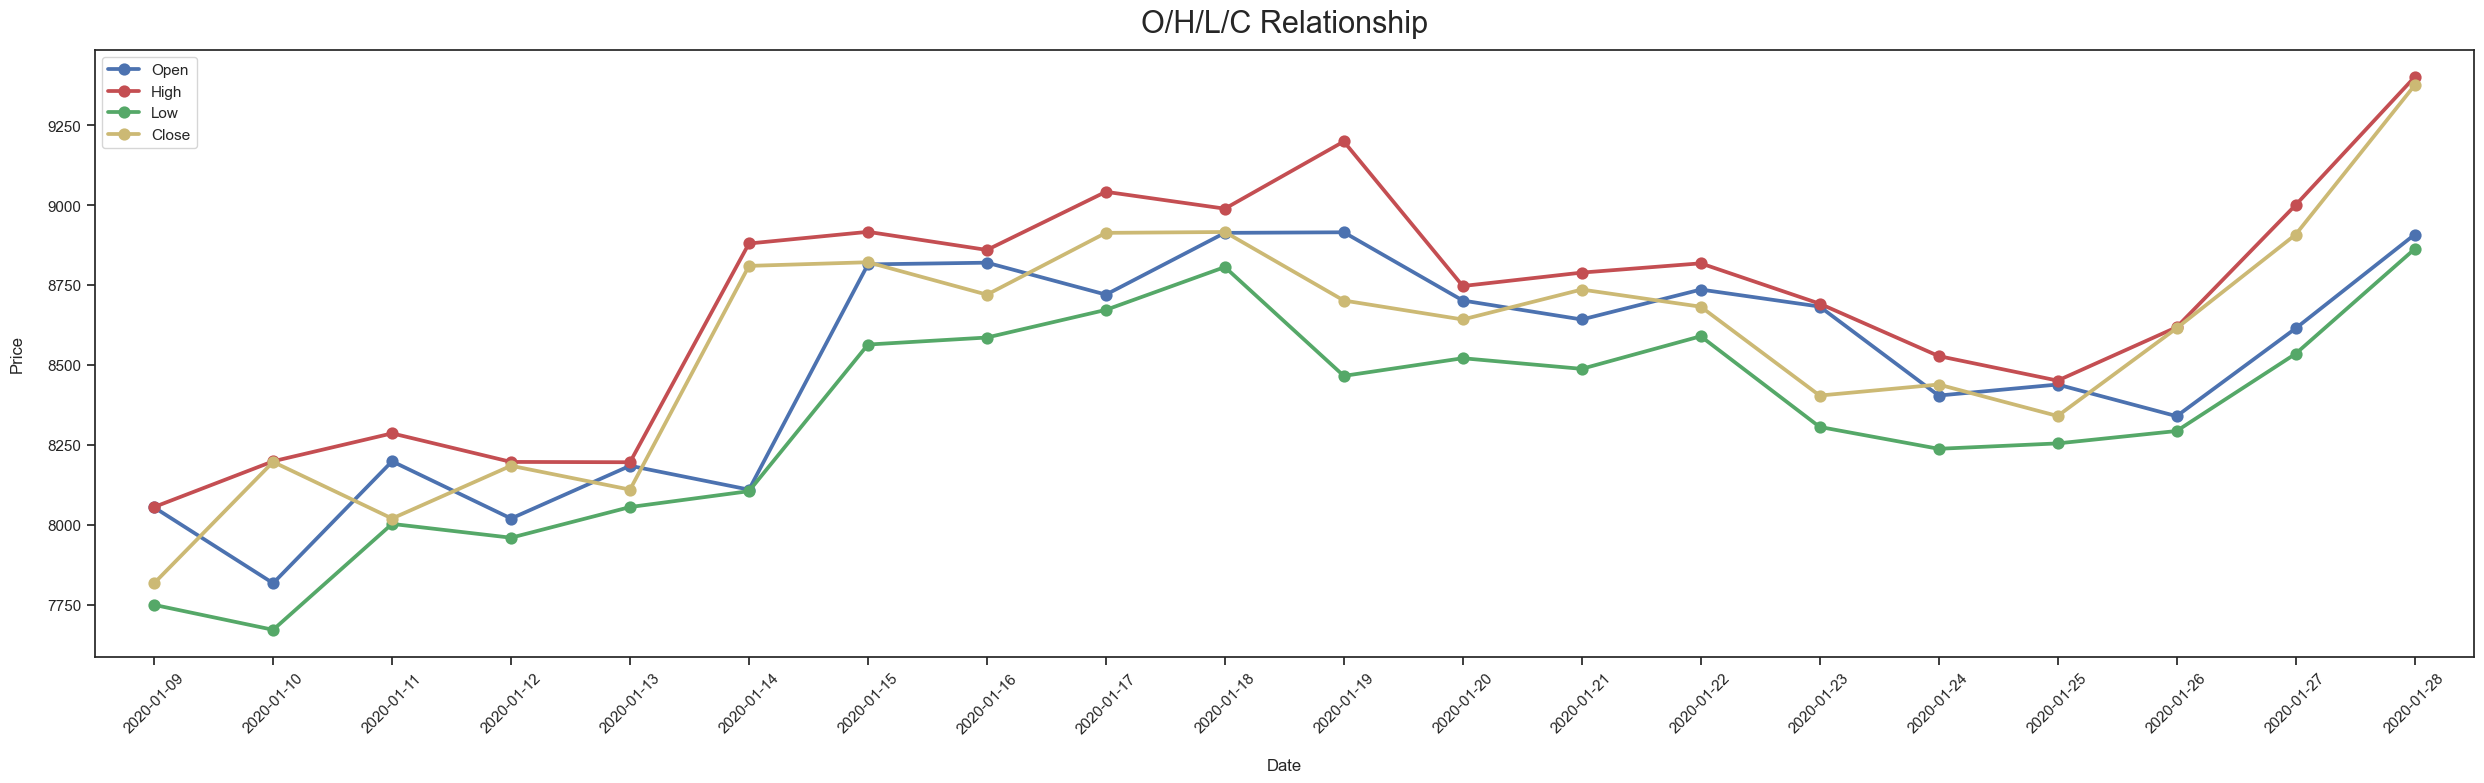

In [51]:
# relationship of open, high, low, close prices

fig, ax = plt.subplots(figsize=(25, 8))

sns.pointplot(data=df3, x='Date', y='open', color="b", label='open')
sns.pointplot(data=df3, x='Date', y='high', color="r", label='high')
sns.pointplot(data=df3, x='Date', y='low', color="g", label='low')
sns.pointplot(data=df3, x='Date', y='close', color="y", label='close')

ax.legend(handles=ax.lines[::len(df3)+1], labels=["Open","High","Low", "Close"])
ax.set_title('O/H/L/C Relationship', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Price', labelpad=16)


t=plt.xticks(rotation=45)
plt.tight_layout()

In [52]:
# subset original dataframe to examine variable relationship across time series

df4 = df.drop(['open', 'high', 'low'], axis=1)
df4 = df4[60:100]

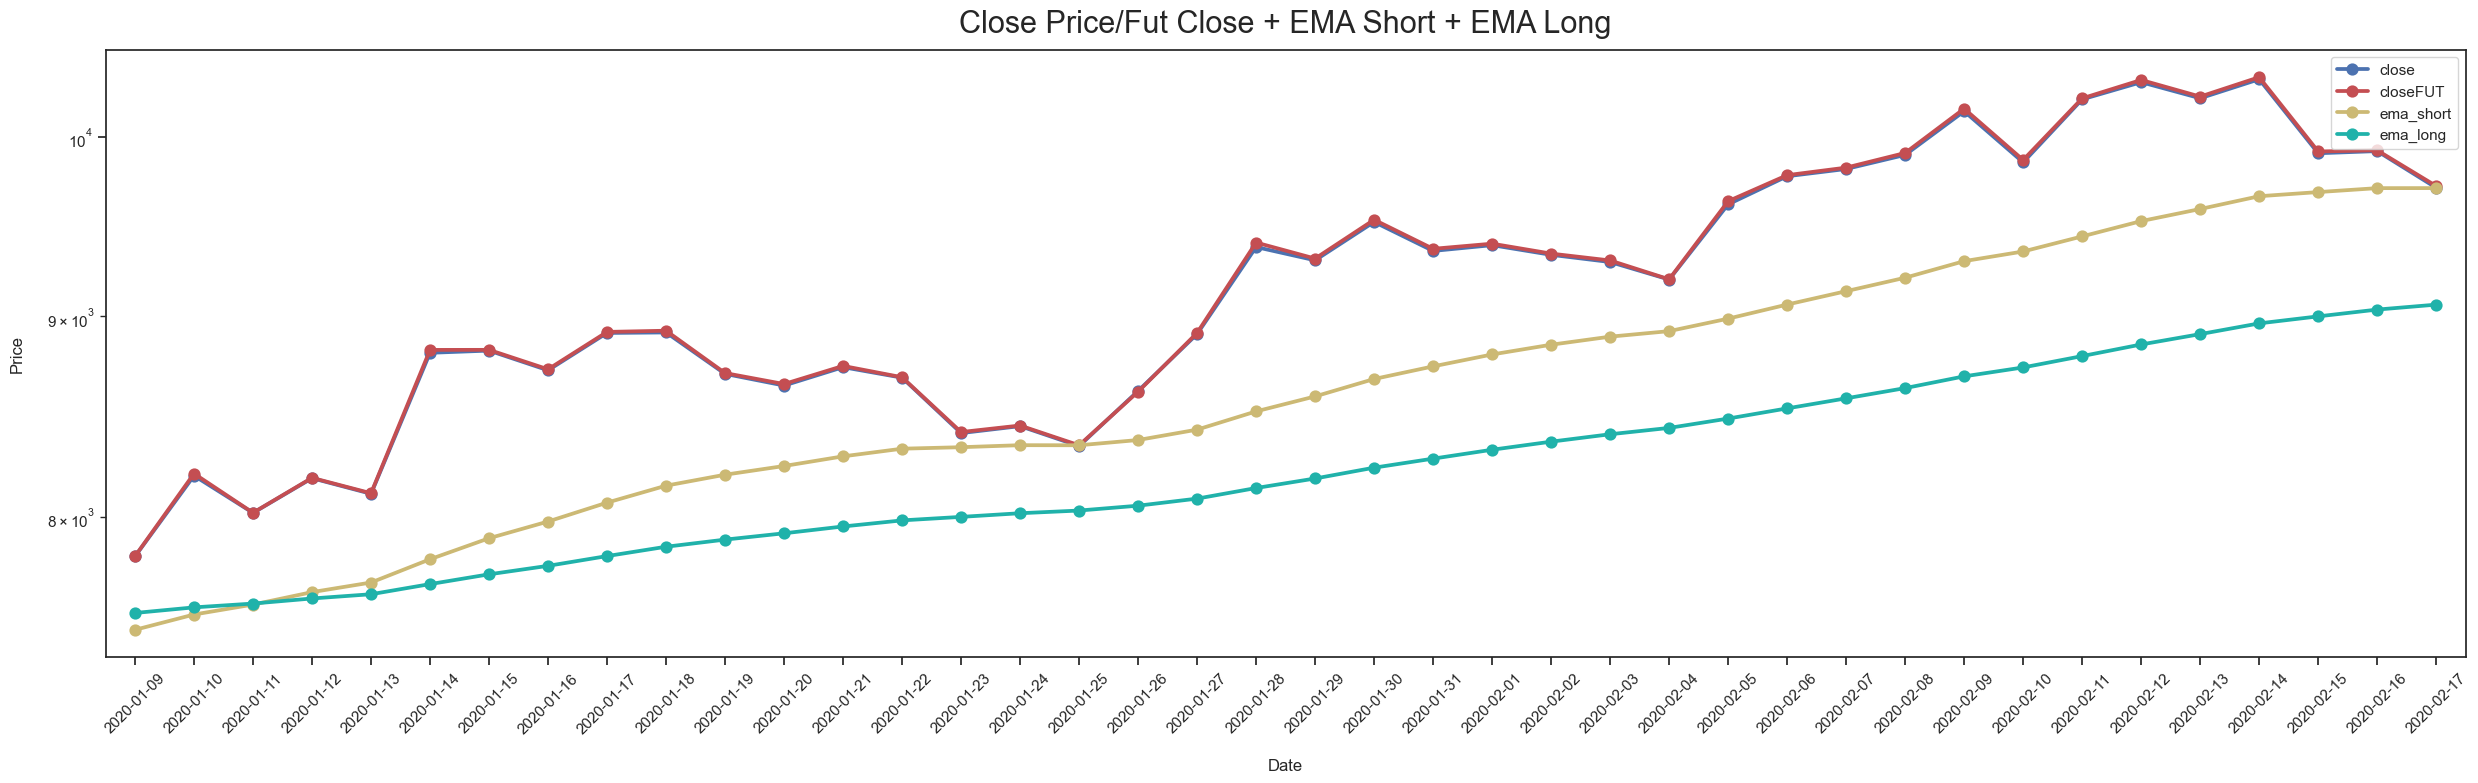

In [56]:
# Close prices vs ema long/short

fig, ax = plt.subplots(figsize=(25,8))

sns.pointplot(data=df4, x='Date', y='close', color="b", label='close')
sns.pointplot(data=df4, x='Date', y='close_fut', color="r", label='close_fut')

sns.pointplot(data=df4, x='Date', y='ema_short', color="y", label='ema_short')
sns.pointplot(data=df4, x='Date', y='ema_long', color="lightseagreen", label='ema_long')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["close","closeFUT", "ema_short", "ema_long"])
ax.set_title('Close Price/Fut Close + EMA Short + EMA Long', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Price', labelpad=16)

ax.set(yscale="log")
t=plt.xticks(rotation=45)
plt.tight_layout()

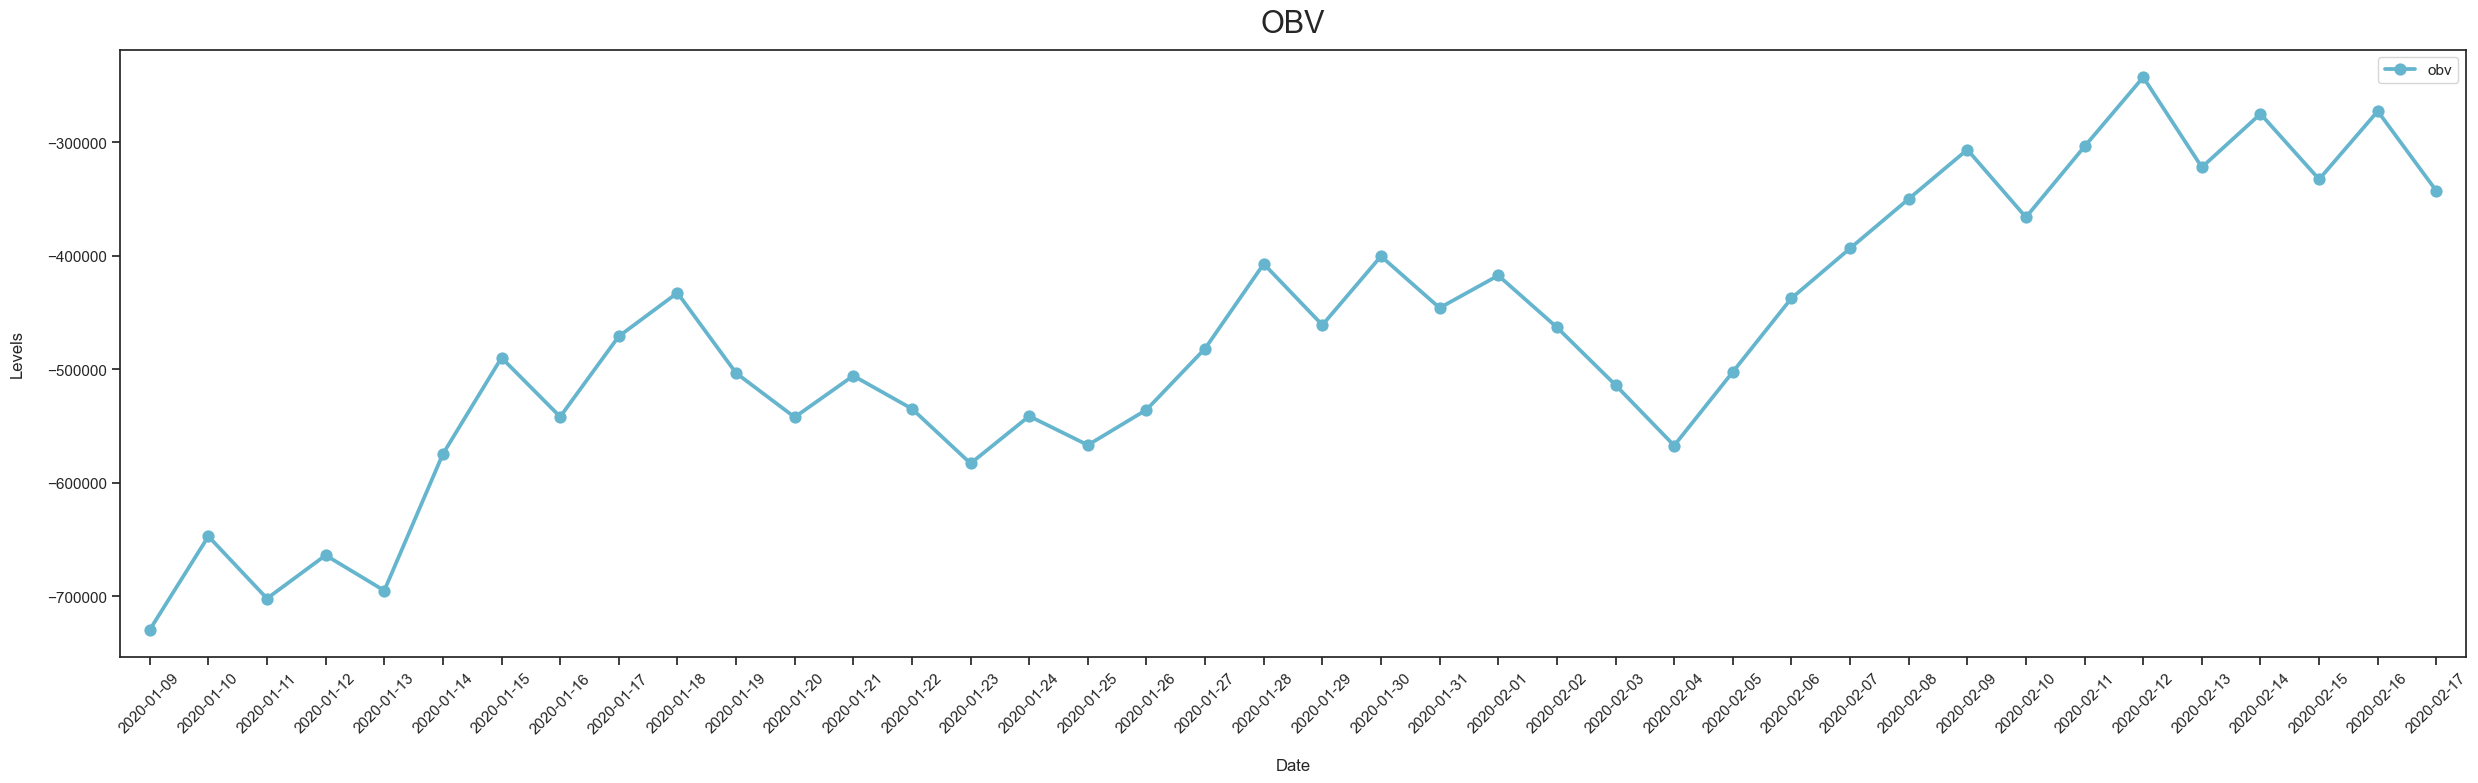

In [57]:
# OBV

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df4, x='Date', y='obv', color="c", label='obv')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["obv"])
ax.set_title('OBV', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

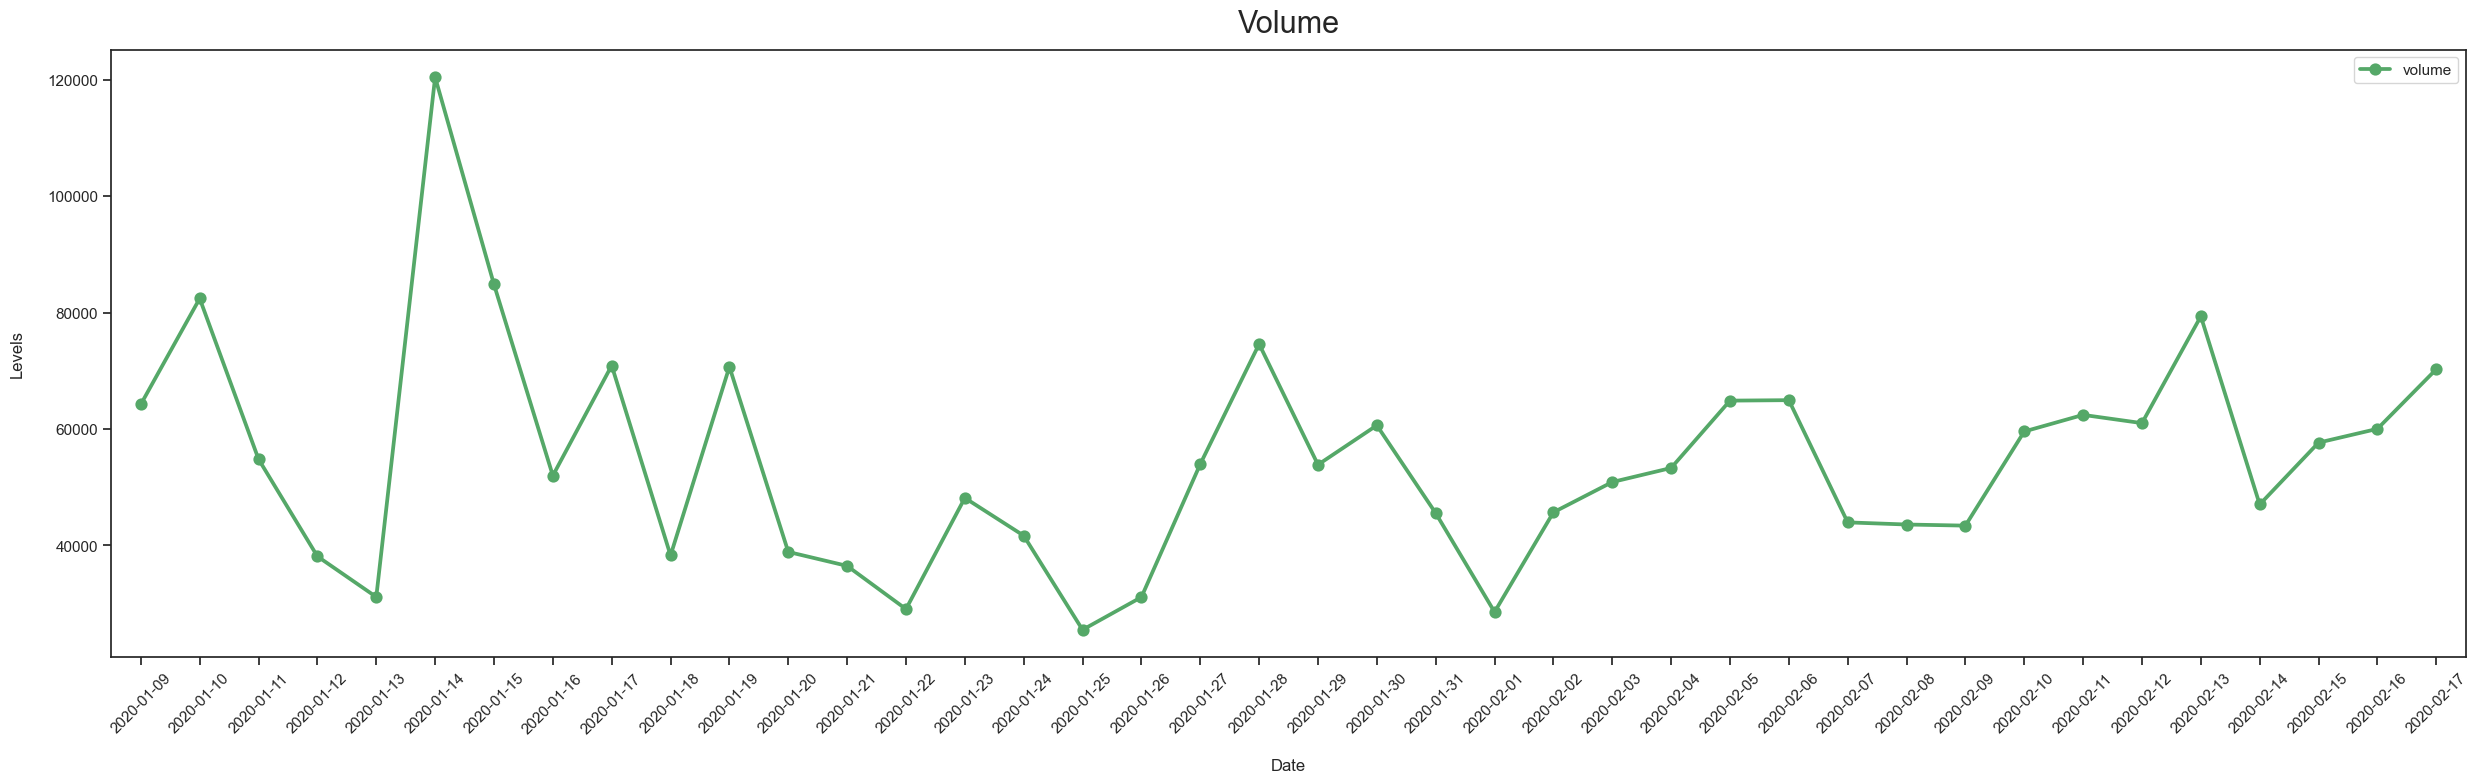

In [58]:
# Volume

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df4, x='Date', y='volume', color="g", label='volume')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["volume"])
ax.set_title('Volume', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

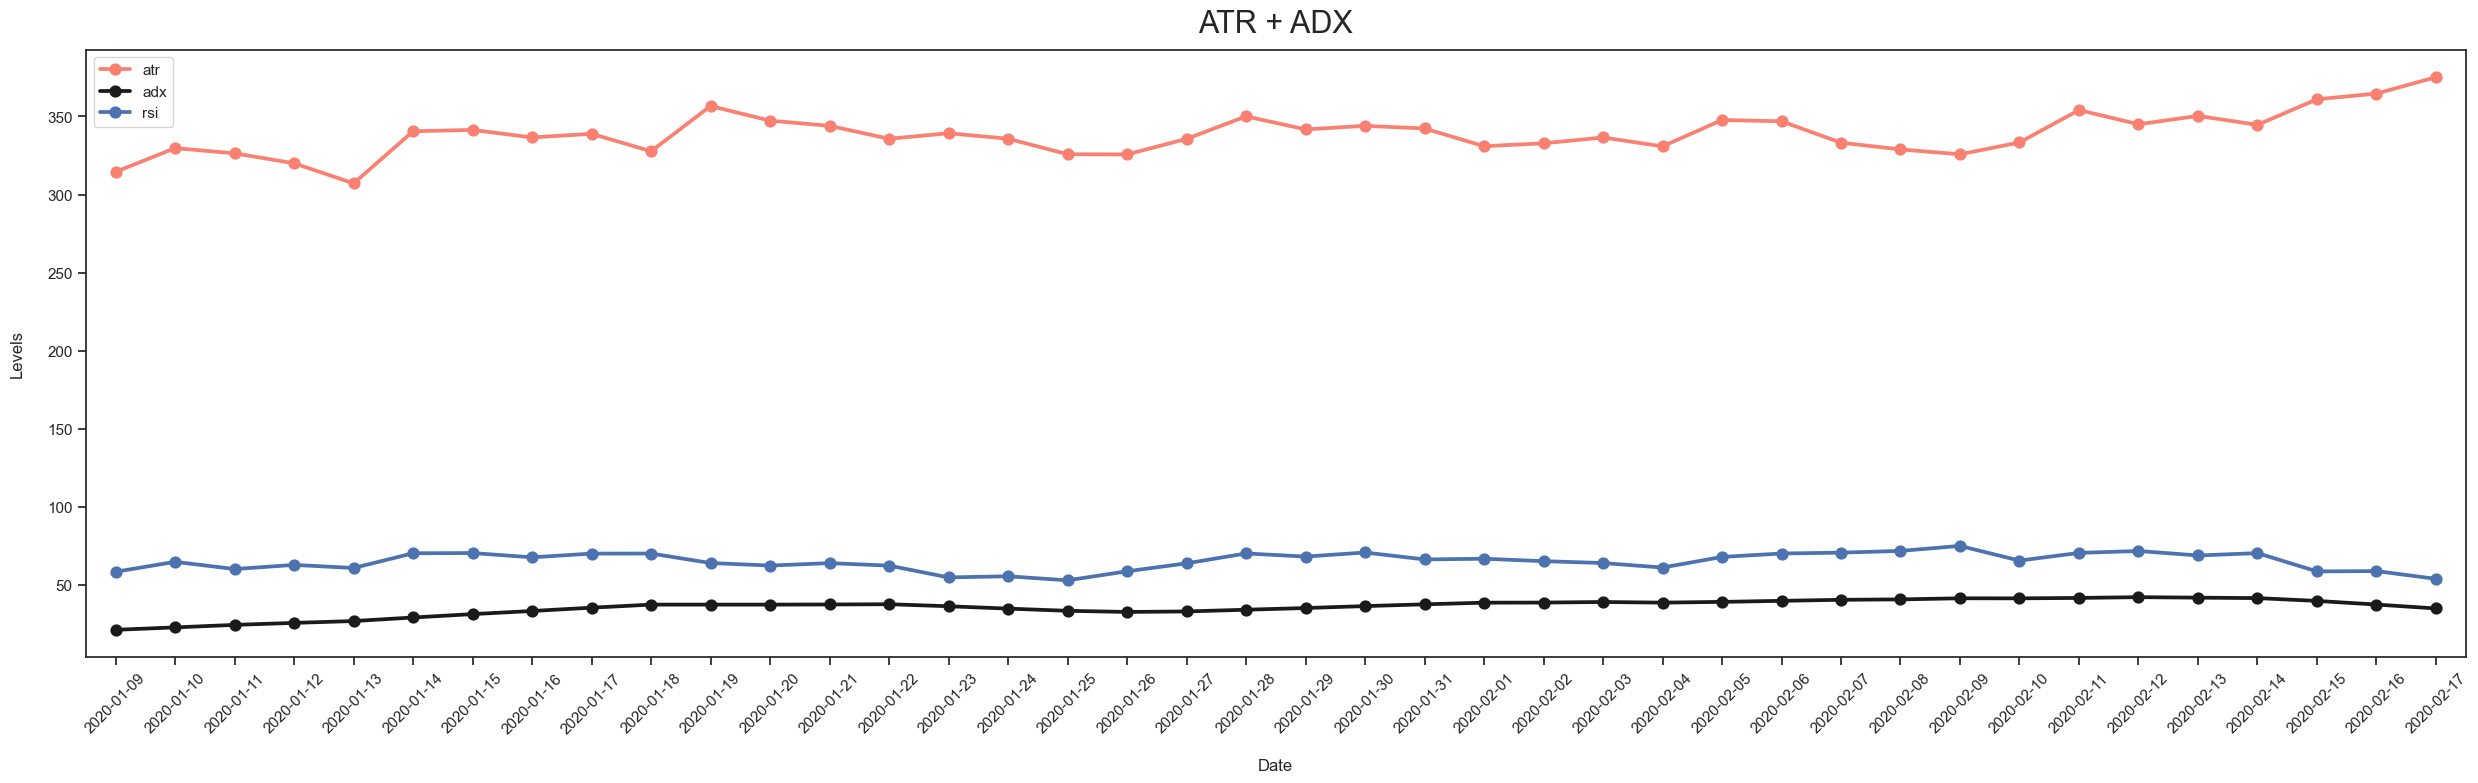

In [59]:
# ATR vs ADX vs RSI

fig, ax = plt.subplots(figsize=(25,8))

sns.pointplot(data=df4, x='Date', y='atr', color="salmon", label='atr')
sns.pointplot(data=df4, x='Date', y='adx', color="k", label='adx')
sns.pointplot(data=df4, x='Date', y='rsi', color="b", label='rsi')

ax.legend(handles=ax.lines[::len(df4)+1], labels=["atr", "adx", "rsi"])
ax.set_title('ATR + ADX', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)


t=plt.xticks(rotation=45)
plt.tight_layout()

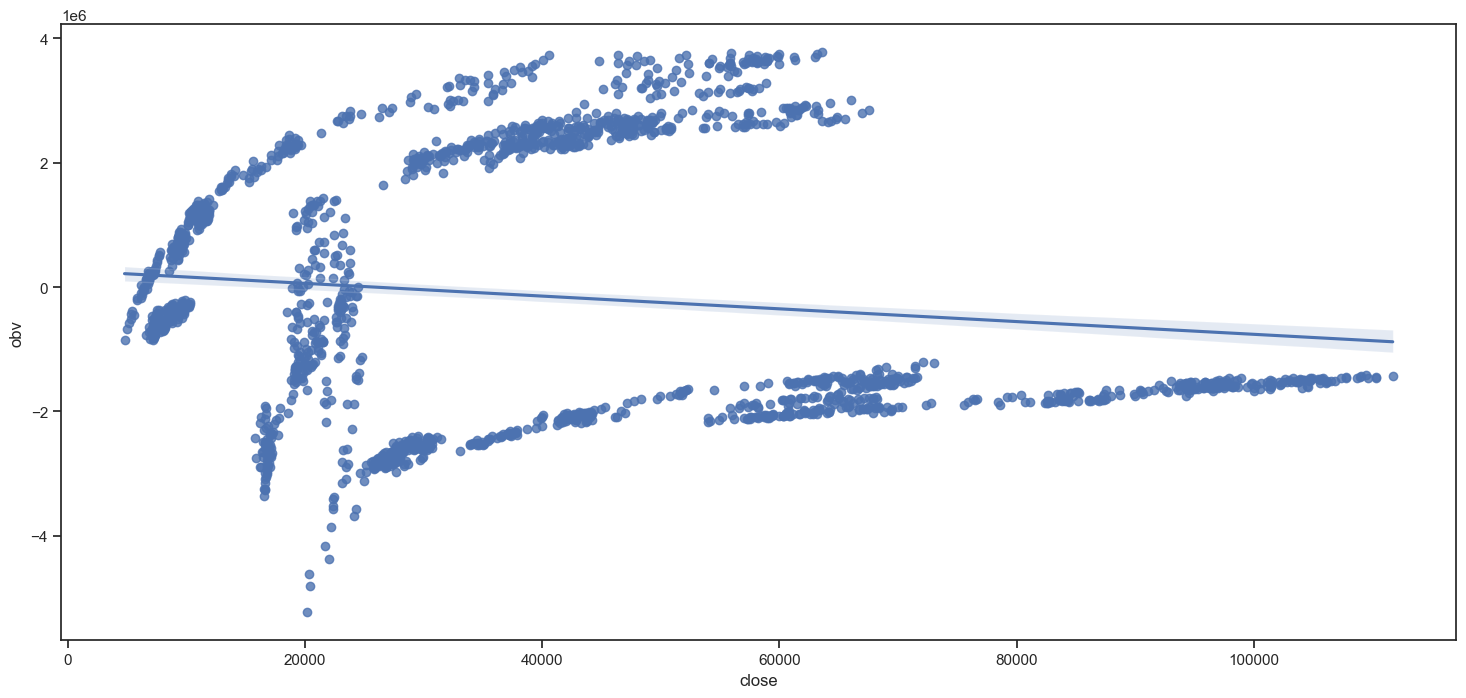

In [60]:
fig, ax = plt.subplots(figsize=(18,8))

_ = sns.regplot(x='close',y='obv',data=df)

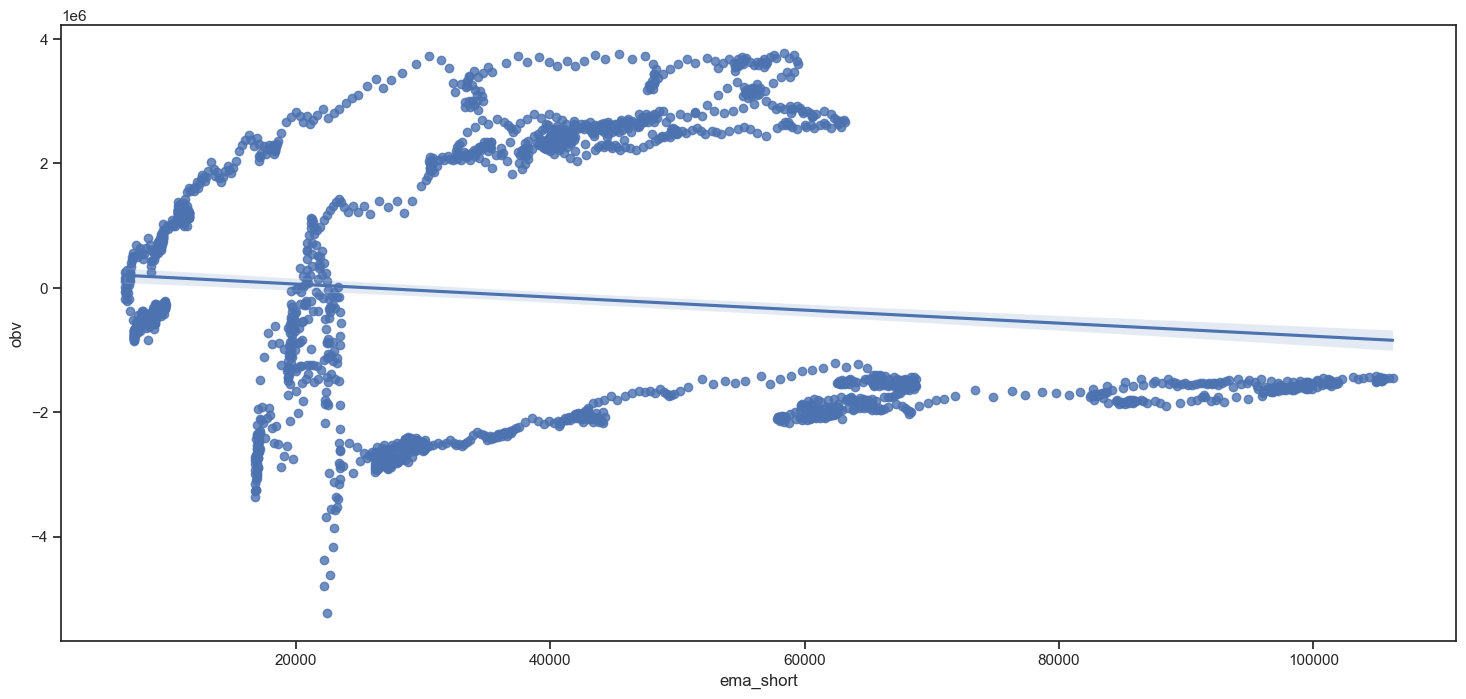

In [61]:
fig, ax = plt.subplots(figsize=(18,8))

_ = sns.regplot(x='ema_short',y='obv',data=df)

/var/folders/xq/59dkdmln053f2bpby56jbwb00000gn/T/ipykernel_42944/1276615144.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ =sns.kdeplot(df['close'], shade=True, color="r")
/var/folders/xq/59dkdmln053f2bpby56jbwb00000gn/T/ipykernel_42944/1276615144.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ =sns.kdeplot(df['close_nextday'], shade=True, color="b")


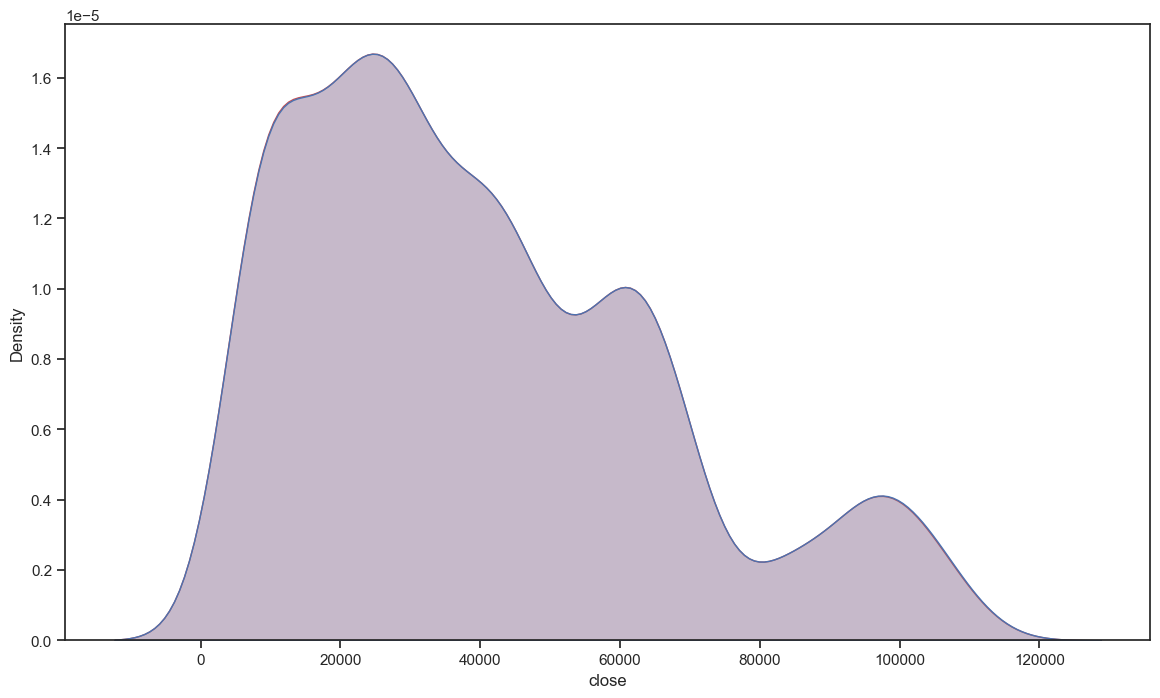

In [63]:
fig, ax = plt.subplots(figsize=(14,8))

_ =sns.kdeplot(df['close'], shade=True, color="r")
_ =sns.kdeplot(df['close_nextday'], shade=True, color="b")

/var/folders/xq/59dkdmln053f2bpby56jbwb00000gn/T/ipykernel_42944/4048680983.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ =sns.kdeplot(df['ema_short'], shade=True, color="r")
/var/folders/xq/59dkdmln053f2bpby56jbwb00000gn/T/ipykernel_42944/4048680983.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ =sns.kdeplot(df['ema_long'], shade=True, color="b")
/var/folders/xq/59dkdmln053f2bpby56jbwb00000gn/T/ipykernel_42944/4048680983.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ =sns.kdeplot(df['close_nextday'], shade=True, color="g")


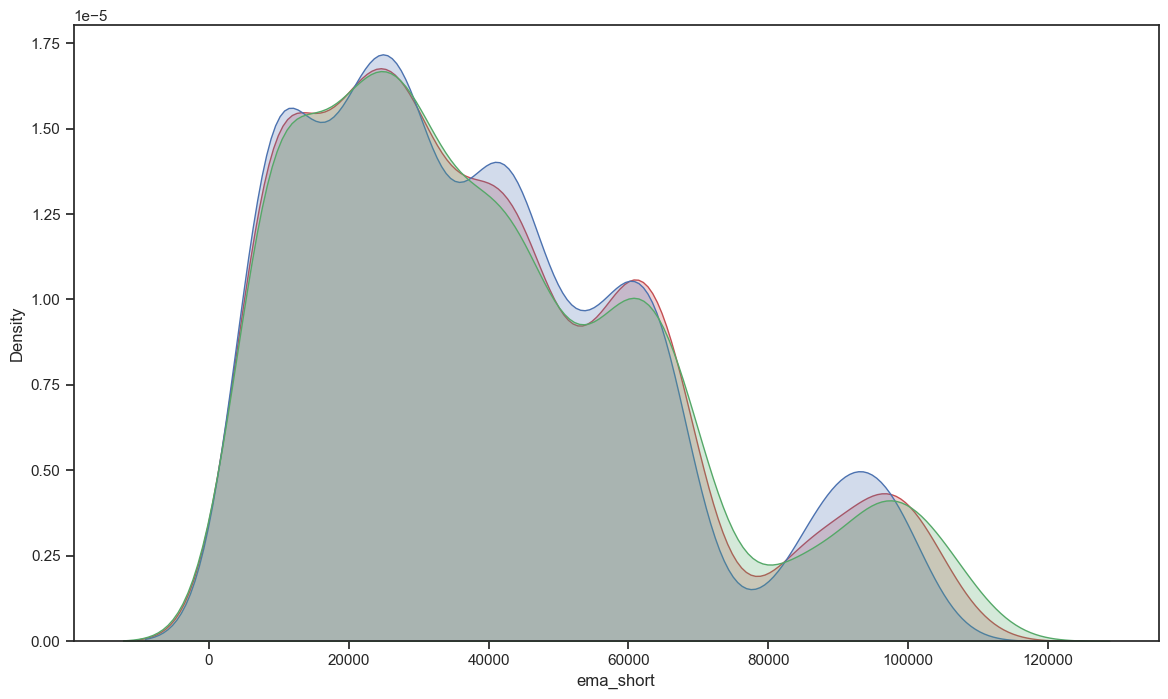

In [64]:
fig, ax = plt.subplots(figsize=(14,8))

_ =sns.kdeplot(df['ema_short'], shade=True, color="r")
_ =sns.kdeplot(df['ema_long'], shade=True, color="b")
_ =sns.kdeplot(df['close_nextday'], shade=True, color="g")

In [67]:
# export csv for modeling

btc_df_notarget = df.drop('close_nextday', axis=1)
btc_df_notarget.to_csv('../data/btc_df_notarget.csv')

In [68]:
# export csv for modeling

btc_df_target = df
btc_df_target.to_csv('../data/btc_df_target.csv')

In [72]:
# export csv for modeling - A

btc_df_corrVariables = df.drop(['open', 'high', 'low', 'close_fut', 'rsi', 'adx'], axis=1)
btc_df_corrVariables.to_csv('../data/btc_df_corrVariables.csv')

In [73]:
# export csv for modeling - B

btc_df_corrVariables_notarget = btc_df_corrVariables.drop('close_nextday',  axis=1)
btc_df_corrVariables_notarget.to_csv('../data/btc_df_corrVariables_notarget.csv')

In [74]:
# export csv for modeling 

btc_df_OHLC_atr = df.drop(['close_fut', 'volume', 'rsi', 'ema_short', 'ema_long', 'adx', 'obv'], axis=1)
btc_df_OHLC_atr.to_csv('../data/btc_df_OHLC_atr.csv')

In [77]:
# Make sure 'Date' is a column in your df
df['Date'] = pd.to_datetime(df['Date'])

# Select columns + keep Date as index
trainingdata = df.set_index('Date')[['close', 'volume', 'ema_short', 'ema_long', 'atr', 'obv','close_nextday']]

# Save with index (Date) preserved
trainingdata.to_csv('../data/train.csv')
